# MODEL 2: Using a Function to predict price based on Property data passed as a parameter 

IMPORTS

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import QuantileTransformer

VIEWING THE DATA AS A DATAFRAME

In [185]:
df=pd.read_csv("all_perth_310121.csv")

In [186]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


DEFINING FEATURES USED TO TRAIN MODEL AND TARGET VARIABLE (i.e Price)

In [187]:
rental_price_features = [
    'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
    'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST',
    'POSTCODE',]
    

In [188]:
target_variable = 'PRICE'

In [189]:
X = df[rental_price_features]
y = df[target_variable]

Splitting the data into training and testing sets

In [190]:
rental_price_df = df[rental_price_features + ['PRICE']].dropna()

X_train, X_test, y_train, y_test = train_test_split(
    rental_price_df.drop('PRICE', axis=1),
    rental_price_df['PRICE'],
    test_size=0.2,
    random_state=42
)



Scaling data using StandardScaler (chosen due to random nature of data and datatype being numerical)

In [191]:
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining and Traning the Model 

In [192]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [193]:
#Print model coefficients
model.coef_

array([ -96867.5431669 ,  211861.84383613,   41646.00856777,
         94713.63789403,  639108.23157875, -215671.75952951,
       -437827.34652531,  -76936.02021859,   56965.90664058,
       -135127.89496232])

In [194]:
#Predicting price of test data to test model
y_pred = model.predict(X_test_scaled)

In [195]:
model.intercept_

609033.5934030006

In [196]:
y_pred = np.array(model.predict(X_test))

/home/g-dey/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [197]:
pd.DataFrame(y_pred)[0]

0      -7.863340e+09
1      -1.208397e+10
2      -7.414789e+09
3      -5.602418e+09
4      -6.646388e+09
            ...     
5647   -6.631310e+09
5648   -1.356703e+10
5649   -2.435794e+10
5650   -1.176301e+10
5651   -1.457470e+10
Name: 0, Length: 5652, dtype: float64

WRITE OUTPUT TO A DATAFRAME AND CALCULATE RMSE

In [198]:
test_op = {
    'y_test': y_test,
    'y_pred': y_pred
}

test_op

{'y_test': 8940     320000
 5001     505000
 28288    388000
 17565    730000
 2638     915000
           ...  
 3954     647000
 23975    775000
 33007    320000
 22127    750000
 4768     450000
 Name: PRICE, Length: 5652, dtype: int64,
 'y_pred': array([-7.86334013e+09, -1.20839658e+10, -7.41478877e+09, ...,
        -2.43579395e+10, -1.17630084e+10, -1.45747025e+10])}

In [199]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('RMSE = ', np.sqrt(mse))

Mean Squared Error:  1.1913343603397378e+20
RMSE =  10914826431.692526


In [200]:
#Function to return predicted price given input data
def predict_price(area_data):
    # Standardize input data
    scaled_area_data = scaler.transform(area_data.reshape(1, -1))
    
    # Predict rental price
    predicted_price = model.predict(scaled_area_data)

    return predicted_price[0]


In [207]:
# features = [
#     'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
#     'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST',
#     'POSTCODE',]

input_area_data = np.array([2, 1, 1, 60, 45, 2007, 4000, 2000, 5000, 6061])
predicted_price_aud = predict_price(input_area_data)
print('Predicted Rent Price (AUD): ', predicted_price_aud)

Predicted Rent Price (AUD):  402343.1872317985


/home/g-dey/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


PLOTTING IMPORTANCE COEFFICIENTS OF FEATURES

In [202]:
coefficients = model.coef_.reshape(-1,1)

In [203]:
coefficients = coefficients.reshape(10,)

In [204]:
coefficients.shape

(10,)

In [205]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

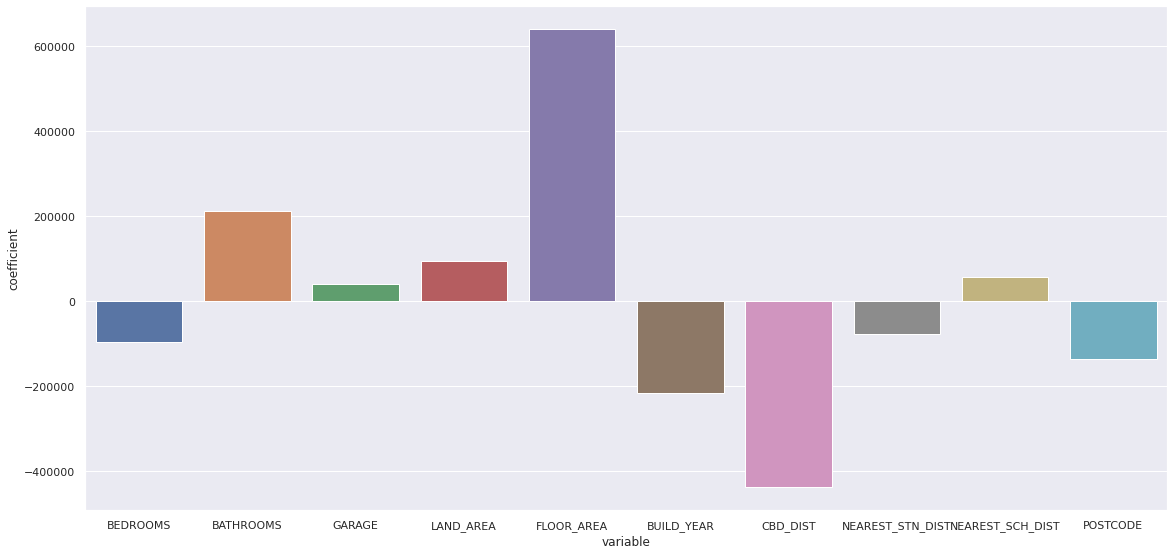

In [206]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])
sns.set(rc={'figure.figsize':(19.4,9.27)})